In [1]:
#Data-Preprocessing
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # use style fivethirtyeight
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Selection
from scipy.stats import chi2_contingency

#Splitting the data into train and test data
from sklearn.model_selection import train_test_split

#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Import File

In [2]:
df=pd.read_csv('/content/financial_loan.csv')

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.describe(include='object')

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,sub_grade,term,verification_status
count,38576,38576,38576,37138,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,1,11,28525,7,5,65,107,102,3,102,14,35,2,3
top,CA,INDIVIDUAL,10+ years,US Army,B,RENT,11-12-2021,16-05-2021,16-05-2021,Fully Paid,16-06-2021,Debt consolidation,B3,36 months,Not Verified
freq,6894,38576,8870,135,11674,18439,2188,10041,1209,32145,1209,18214,2834,28237,16464


In [5]:
df.shape

(38576, 24)

In [6]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


<Axes: >

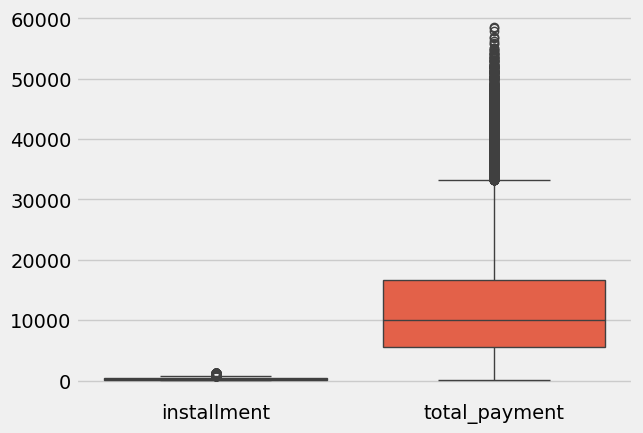

In [7]:
sns.boxplot(df[['installment','total_payment']])

In [8]:
(df['total_payment']>30000).value_counts()/df.shape[0]*100

,count
total_payment,
False,94.711738
True,5.288262


Since the total count of values which are outliers in case of feature(total_payment) is just 5% of the total number of values available hence we may omit them.

In [9]:
df.isna().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,1438
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [10]:
#emp_title has gobt to many missing values lets replace it with not known
df['emp_title'].fillna('Not Known',inplace=True)

In [11]:
df.isna().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,0
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


In [12]:
#Identify duplicted values
df[df.duplicated(keep=False)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment


In [13]:
#select all duplicate rows based on selected columns
df[df.duplicated(subset=['id'],keep=False)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment


In [14]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,object
last_credit_pull_date,object
last_payment_date,object


In [15]:
#for emp_length and term it should be float or int as they are numeric values so lets trim it and change the datatype to float64
df['emp_length']=df['emp_length'].str.replace('+','')
df['emp_length']=df['emp_length'].str.replace('<','')
df['emp_length']=df['emp_length'].str.replace('years','')
df['emp_length']=df['emp_length'].str.replace('year','')
df['emp_length']=df['emp_length'].str.replace(' ','')
df['emp_length']=df['emp_length'].astype('float64')
df['term']=df['term'].str.replace('months','')
df['term']=df['term'].astype('float64')

In [16]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,1.0,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60.0,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9.0,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36.0,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4.0,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36.0,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,1.0,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60.0,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10.0,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36.0,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In the dataset id, application_type do not serve any purpose thecolumns can dropped.

In [17]:
df=df.drop(['id','application_type'],axis=1)

In [18]:
df.describe()
df.describe(include='object')

,address_state,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,sub_grade,verification_status
count,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576,38576
unique,50,28526,7,5,65,107,102,3,102,14,35,3
top,CA,Not Known,B,RENT,11-12-2021,16-05-2021,16-05-2021,Fully Paid,16-06-2021,Debt consolidation,B3,Not Verified
freq,6894,1438,11674,18439,2188,10041,1209,32145,1209,18214,2834,16464


**EDA**

In [19]:
import plotly.express as ps

In [20]:
ts = df['loan_status'].value_counts()

In [21]:

fig = ps.pie(ts, values=ts, names=ts.index, title='Pie Chart')
fig.show()

It shows that around 14% of the loan_amount has been charged off for the customers.

In [22]:
#categorical  and numeric data segregation
categorical = ['address_state',	'application_type',	'emp_title',	'grade',	'home_ownership',	'loan_status',	'purpose	sub_grade', 'verification_status']
numeric = ['annual_income',	'dti',	'installment',	'int_rate',	'loan_amount',	'total_acc',	'total_payment']

In [23]:
cat = df.select_dtypes('object').columns.tolist()
num = df.select_dtypes('number').columns.tolist()

In [24]:
num

['emp_length',
 'member_id',
 'term',
 'annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment']

In [25]:
cat

['address_state',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'purpose',
 'sub_grade',
 'verification_status']

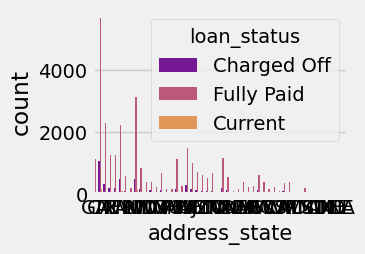

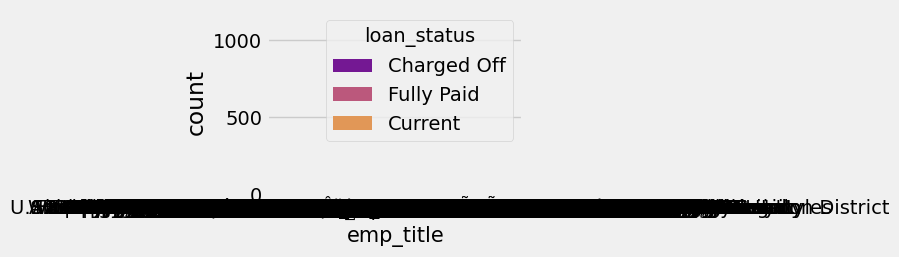

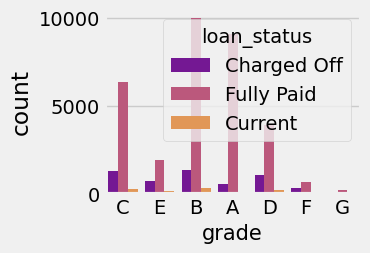

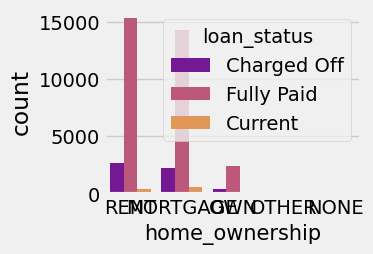

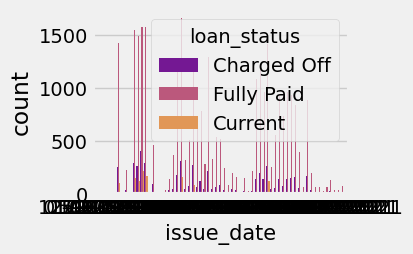

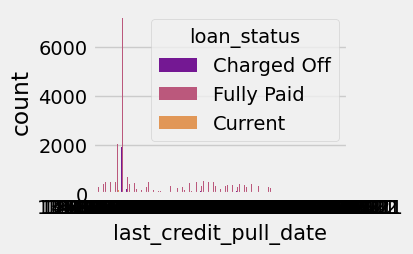

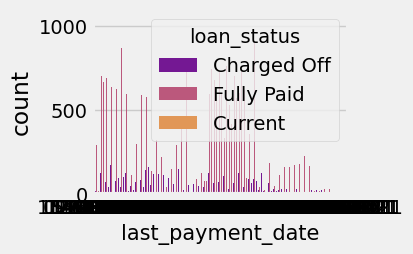

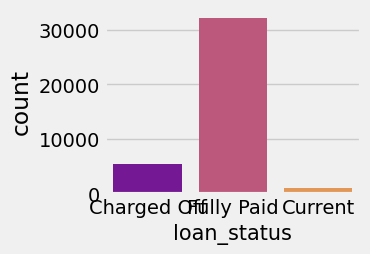

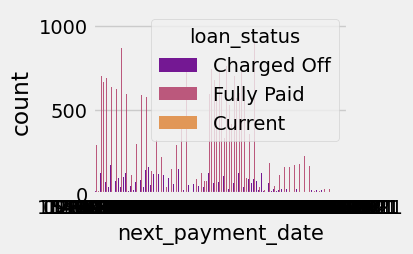

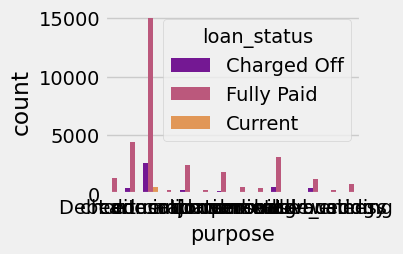

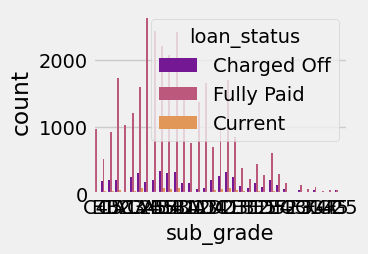

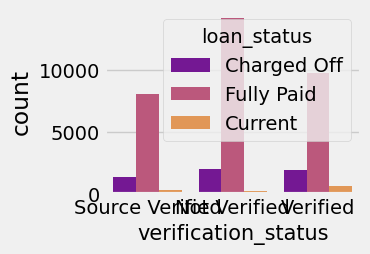

In [26]:
for i in cat:
  plt.figure(figsize=(10,5))
  plt.subplot(2,3,3)
  sns.countplot(x=i, hue='loan_status', data=df, palette='plasma')
  plt.xlabel(i, fontsize=15)

In [27]:
#plot categorical with target data
pd.crosstab(df['loan_amount'],df['home_ownership'])

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_amount,,,,,
500,3,0,0,0,2
700,0,0,0,0,1
725,0,0,0,0,1
750,0,0,0,0,1
800,1,0,0,0,0
...,...,...,...,...,...
34475,2,0,0,1,2
34525,1,0,0,0,0
34675,1,0,0,0,0


In [28]:
df.select_dtypes('object').columns.to_list()

['address_state',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'purpose',
 'sub_grade',
 'verification_status']

In [29]:
#finding the unique values in the categorical columns
for i in cat:
  print(i,df[i].unique())

address_state ['GA' 'CA' 'TX' 'IL' 'PA' 'FL' 'MI' 'RI' 'NY' 'MD' 'WI' 'NV' 'UT' 'WA'
 'NH' 'HI' 'MA' 'OK' 'NJ' 'OH' 'AZ' 'CT' 'MN' 'CO' 'TN' 'VA' 'MO' 'DE'
 'NM' 'LA' 'AR' 'KY' 'NC' 'SC' 'WV' 'KS' 'WY' 'OR' 'AL' 'VT' 'MS' 'DC'
 'MT' 'SD' 'AK' 'IN' 'ME' 'ID' 'NE' 'IA']
emp_title ['Ryder' 'MKC Accounting' 'Chemat Technology Inc' ...
 'Anaheim Regional Medical Center' 'Brooklyn Radiology' 'Allen Edmonds']
grade ['C' 'E' 'B' 'A' 'D' 'F' 'G']
home_ownership ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']
issue_date ['11-02-2021' '01-01-2021' '05-01-2021' '25-02-2021' '17-07-2021'
 '19-11-2021' '11-06-2021' '02-09-2021' '09-02-2021' '22-07-2021'
 '11-09-2021' '11-08-2021' '11-12-2021' '11-10-2021' '02-12-2021'
 '09-10-2021' '12-12-2021' '02-02-2021' '07-07-2021' '08-01-2021'
 '09-08-2021' '11-01-2021' '11-11-2021' '09-06-2021' '10-01-2021'
 '11-05-2021' '10-03-2021' '10-05-2021' '09-05-2021' '11-04-2021'
 '09-07-2021' '09-12-2021' '09-11-2021' '09-03-2021' '08-10-2021'
 '08-03-2021' '08-11-2021' '0

In [30]:
df['home_ownership'].replace('NONE','OTHER',inplace=True)

In [31]:
df['home_ownership'].value_counts()

,count
home_ownership,
RENT,18439
MORTGAGE,17198
OWN,2838
OTHER,101


In [32]:
pd.crosstab(df['loan_status'],df['purpose'])

purpose,Debt consolidation,car,credit card,educational,home improvement,house,major purchase,medical,moving,other,renewable_energy,small business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,2651,155,508,50,327,57,206,100,84,587,17,455,50,86
Current,567,49,101,0,94,14,35,12,7,120,1,73,4,21
Fully Paid,14996,1293,4389,265,2455,295,1869,555,468,3117,76,1248,298,821


In [33]:
#using labelencoder for categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
  df[i]=le.fit_transform(df[i])

In [34]:
df

,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,10,1.0,18809,2,3,49,73,63,0,64,...,13,60.0,1,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,4,9.0,13534,4,3,0,88,84,2,85,...,20,36.0,1,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,4,4.0,4462,2,3,4,64,12,0,13,...,14,36.0,0,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,42,1.0,25433,1,0,64,64,50,2,51,...,6,60.0,1,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,14,10.0,11421,0,0,0,88,84,2,85,...,0,36.0,2,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,30,1.0,11844,2,0,54,105,100,1,100,...,10,60.0,2,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,33,8.0,21180,2,3,57,104,100,1,100,...,10,60.0,2,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,4,5.0,1432,3,3,56,105,100,1,100,...,19,60.0,2,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,33,5.0,3230,3,3,57,105,100,1,100,...,19,60.0,2,368000.0,0.0009,612.72,0.1825,24000,9,33677


<Axes: >

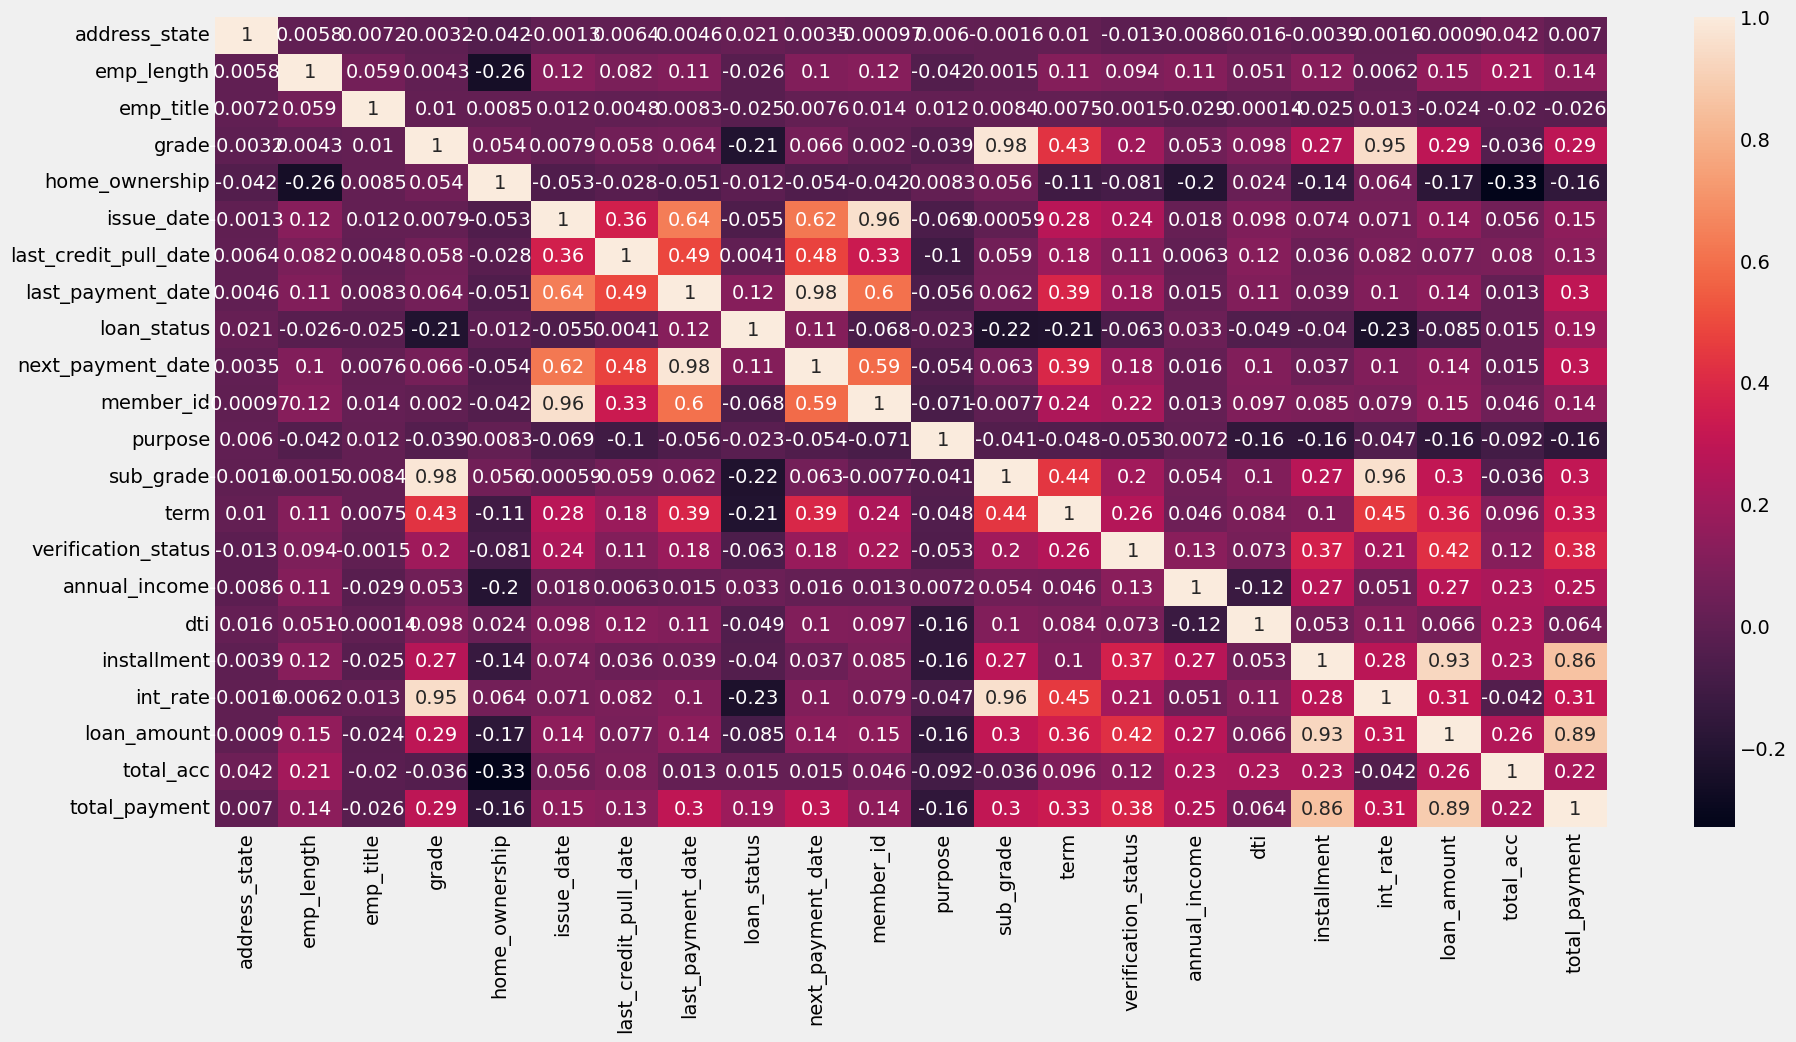

In [35]:
#using heatmap to check the correlation ebtween the features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Its important to check for multicollinearity among the independent variables. Hence we will use Variance inflation factor (VIF) to check for multicollinearity.

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [37]:
#defining independent variables (X)
X = df[['term','installment','verification_status','int_rate','loan_amount','grade','sub_grade']]

In [38]:
#Adding a constant to the independent variables matrix
X = sm.add_constant(X)

#Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#Display the VIF values
print(vif_data)

              Variable        VIF
0                const  76.704327
1                 term   2.950509
2          installment  16.051141
3  verification_status   1.239669
4             int_rate  13.700398
5          loan_amount  17.693643
6                grade  25.258175
7            sub_grade  33.327533


We know that vif value greater than 5 reflects on multicolinearity issue. So over here most of the variables except term and verification_status hold high multicolinearity. We may use Lasso regression in order to add a penalty term to the regression coefficients, which helps to shrink the  coefficients and reduce the impact of multicolinearity.

In [55]:
import pandas as pd

data=df[['issue_date','last_payment_date','last_credit_pull_date','next_payment_date']]

for i in data.columns:
  # Pass the column data (df[i]) to pd.to_datetime() with the correct format
  df[i]=pd.to_datetime(df[i], format='%d-%m-%Y', errors='coerce')

  # Convert the datetime objects to Unix timestamps (float64)
  # The .values attribute extracts the underlying NumPy array, which can be safely cast to float64
  df[i] = df[i].apply(lambda x: x.timestamp() if pd.notna(x) else pd.NaT).values.astype('float64')

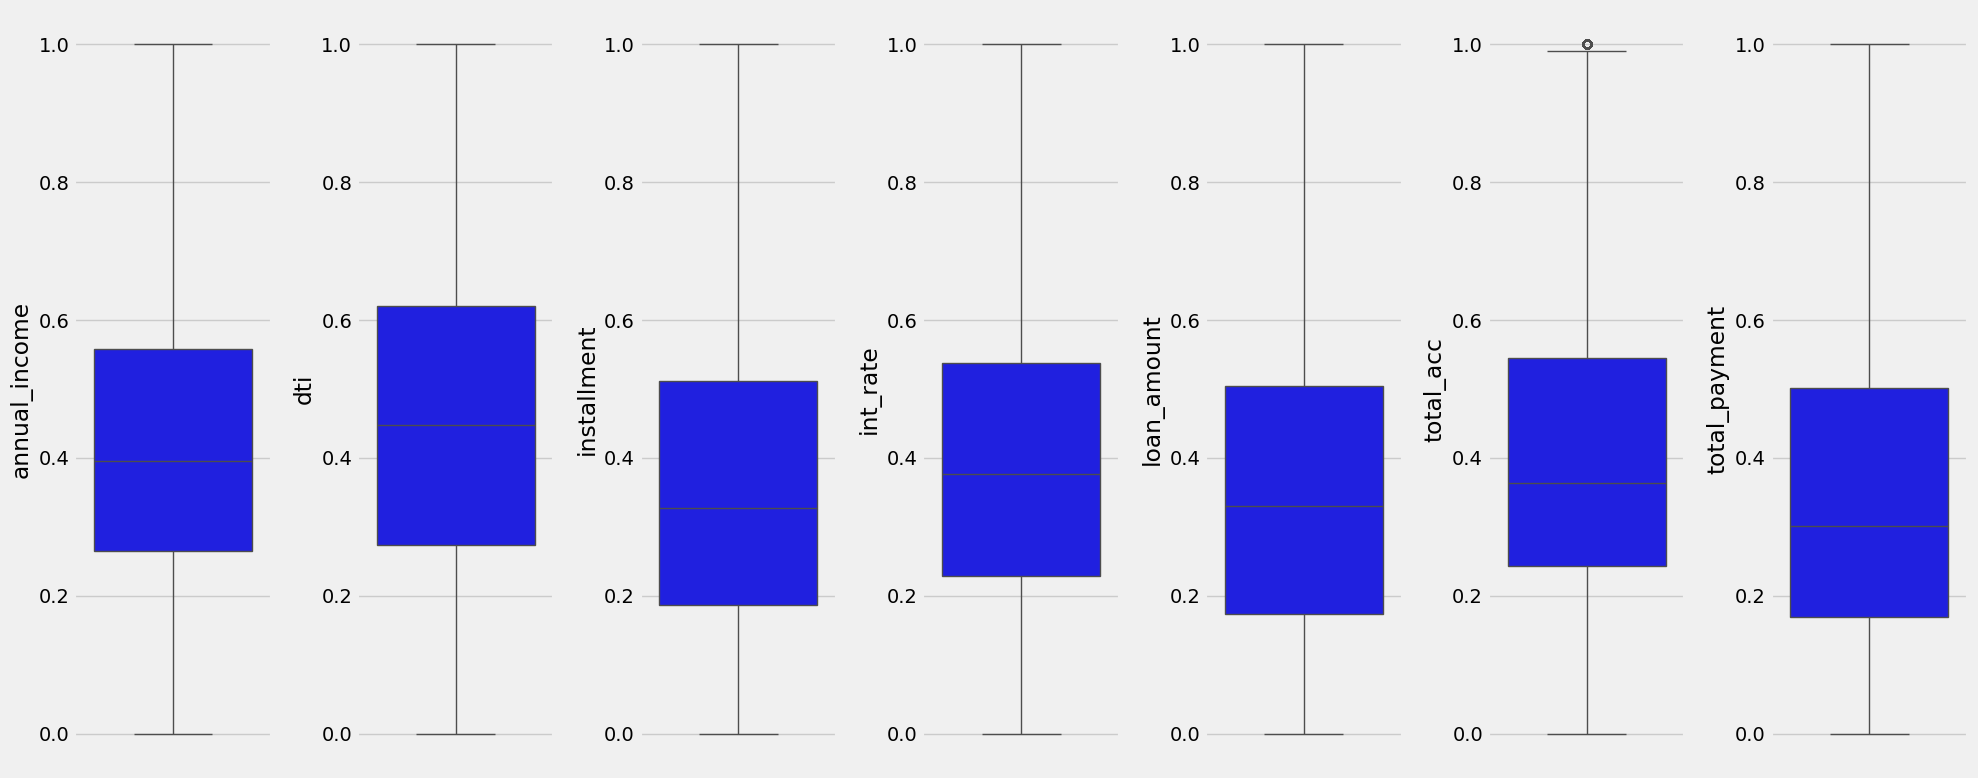

In [56]:
#Identifying the outliers
plt.figure(figsize=(20,8))
for i in range(0, len(numeric)):
  plt.subplot(1,len(numeric),i+1)
  sns.boxplot(y=df[numeric[i]],color='blue')
  plt.tight_layout()

In [57]:
#IDentify outlier using IQR
for col in numeric:
  Q1=df[col].quantile(0.25)
  Q2=df[col].quantile(0.50)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1-(IQR*1.5)
  upper_bound = Q3+(IQR*1.5)
  #filtering outlier & replace with upper and lower bound
  df[col]=np.where(df[col]>=upper_bound,upper_bound,df[col])
  df[col]=np.where(df[col]<=lower_bound,lower_bound,df[col])


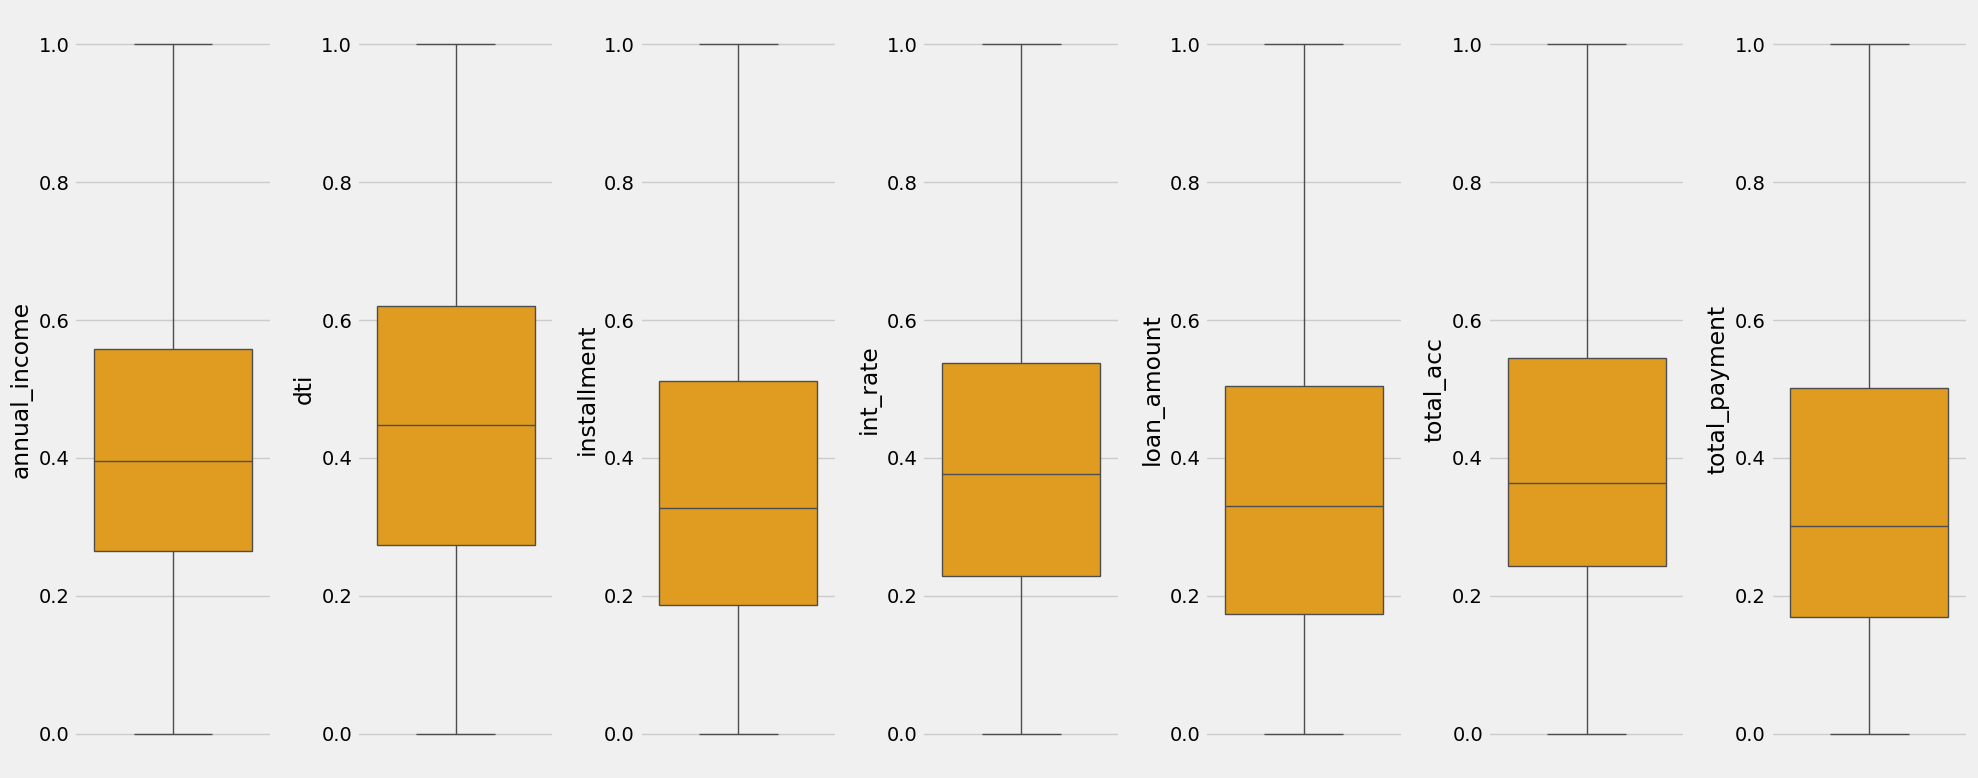

In [58]:
#Identify using boxplot
plt.figure(figsize=(20,8))
for i in range(0, len(numeric)):
  plt.subplot(1,len(numeric),i+1)
  sns.boxplot(y=df[numeric[i]], color='orange')
  plt.tight_layout()

In [59]:
#We didn't remove the outliers instead replaced it with the upper and lower bound and hence after replacement so we can see that there are no outliers present.

In [60]:
#Minmaxscaler
#Since the values are not of same scale value
scaler=MinMaxScaler()
df[numeric]=scaler.fit_transform(df[numeric])

In [61]:
df[numeric]

,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,0.183420,0.033344,0.053978,0.576867,0.069565,0.040404,0.029402
1,0.310403,0.178393,0.114633,0.774231,0.086957,0.040404,0.117757
2,0.324512,0.696232,0.496441,0.617277,0.400000,0.181818,0.105182
3,0.268075,0.180060,0.099506,0.306296,0.139130,0.141414,0.147068
4,0.557314,0.077026,0.111086,0.035725,0.104348,0.525253,0.114621
...,...,...,...,...,...,...,...
38571,0.677243,0.662221,0.655403,0.443338,0.826087,0.626263,0.962321
38572,0.324512,0.152718,0.689741,0.472621,0.859130,0.323232,0.960029
38573,0.430331,0.578193,0.748696,0.706881,0.852174,0.363636,1.000000
38574,1.000000,0.003001,0.730096,0.751391,0.817391,0.141414,1.000000


In [62]:
#Introducing lasso regression after splitting the dataset
X=df.drop('loan_status',axis=1)
Y=df['loan_status']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3, random_state=42)

In [63]:
#Model training
from sklearn.linear_model import Lasso as LassoRegression
model = LassoRegression(
    max_iter=1000, alpha=0.1)
model.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [64]:
#Prediction on test set
y_pred = model.predict(X_test)


In [65]:
print("Predicted values: ", np.round(y_pred[:10], 2))
print("Real values:   ",Y_test[:10])
print("Trained coefficient: ",round(model.coef_[0],2))
print("Trained intercept: ", round(model.intercept_,2))

Predicted values:  [1.54 1.37 1.83 1.91 1.93 1.41 1.5  1.78 1.88 1.38]
Real values:    34007    2
24149    2
31634    2
217      2
25469    2
21098    2
23715    2
6898     2
8322     2
37208    2
Name: loan_status, dtype: int64
Trained coefficient:  0.0
Trained intercept:  2.32


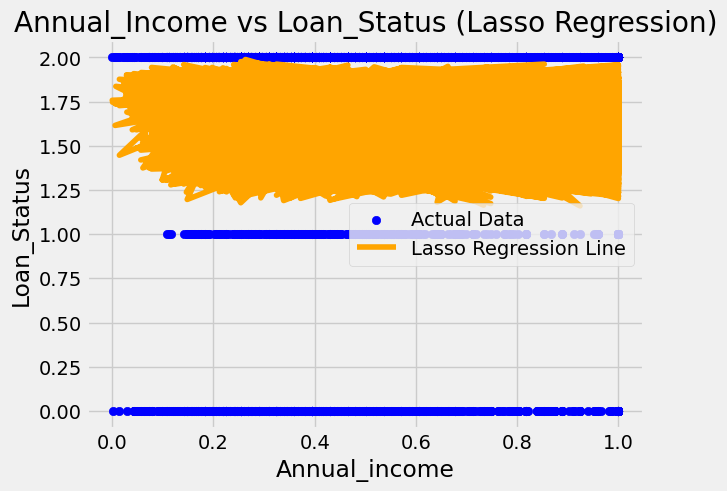

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Assuming you're using pandas for df


# ... (Your existing code for model training and prediction) ...


# Assuming 'annual_income' is a column in your DataFrame and you want to plot it against 'loan_status'
plt.scatter(X_test['annual_income'], Y_test, color='blue', label='Actual Data')  # Selecting a specific column from X_test
plt.plot(X_test['annual_income'], y_pred, color='orange', label='Lasso Regression Line')
plt.title('Annual_Income vs Loan_Status (Lasso Regression)')
plt.xlabel('Annual_income')  # Changed x-axis label
plt.ylabel('Loan_Status')  # Changed y-axis label
plt.legend()
plt.show()

# Alternatively, if you want to see relationships between all features and loan_status, you can use pandas' scatter_matrix
# from pandas.plotting import scatter_matrix
# scatter_matrix(pd.concat([X_test, Y_test], axis=1), alpha=0.2, figsize=(10, 10), diagonal='kde')
# plt.show()

In [70]:
#its a classification problem hence we'll predict the loan status
# thus using decision tree, logistic regression and ROC-AUC codes for classification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify = Y, random_state=2022)
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)
y_pred = logistic_classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))


[[   0    0  800]
 [   0    0  165]
 [   0    0 4822]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       800
           1       0.00      0.00      0.00       165
           2       0.83      1.00      0.91      4822

    accuracy                           0.83      5787
   macro avg       0.28      0.33      0.30      5787
weighted avg       0.69      0.83      0.76      5787



The accuracy achieved is 83.5% which is good enough for a trained model

In [80]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)


DecisionTreeClassifier()

In [82]:
model.score(X_test,Y_test)

0.9186106791083463

So the model accuracy on using decision tree classification model we get 91%. Hnce we should go for decision tree classification model rather than logistic regression.